In [463]:
#Import packages
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [464]:
#import data
data = pd.read_csv('/Users/sahitibasani/Documents/Capstone/Capstone/Marketing/Datasets/Electric_Vehicle_Population_Data.csv')

In [465]:
data.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Latitude,Longitude
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,-122.842388,46.855401
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,-122.302507,47.911921
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,-81.558651,30.777128
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,-122.802370,47.024990
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,-122.355669,48.416422


In [466]:
data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
ZIP Code                                               int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Latitude                                             float64
Longitude                                            float64
dtype: object

In [467]:
data.shape

(91933, 16)

In [468]:
washington_ev = data.drop(['VIN (1-10)', 'Legislative District', 'DOL Vehicle ID'], axis=1)

In [469]:
washington_ev.head()

,County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Latitude,Longitude
0,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,-122.842388,46.855401
1,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,-122.302507,47.911921
2,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,-81.558651,30.777128
3,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,-122.802370,47.024990
4,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,-122.355669,48.416422


In [470]:
# def convert_float(inp):
#     splitted_data = inp.split(" ")
#     return float(splitted_data[-2]), float(splitted_data[-1])
# # lat, long = convert_float(sampleInp)
# # print("Types : ",type(lat), type(long), "Values: ", lat, long)

In [471]:
# for value in washington_ev['Vehicle Location']:
#     latitude, longitute = convert_float(value)
#     print(latitude)

In [472]:
# washington_ev.head()

In [473]:
washington_ev.shape

(91933, 13)

In [474]:
washington_ev.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             91925 non-null  object 
 1   City                                               91933 non-null  object 
 2   State                                              91933 non-null  object 
 3   ZIP Code                                           91933 non-null  int64  
 4   Model Year                                         91933 non-null  int64  
 5   Make                                               91933 non-null  object 
 6   Model                                              91916 non-null  object 
 7   Electric Vehicle Type                              91933 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  91933 non-null  object 
 9   Electr

In [475]:
# remove all Nas
washington_ev = washington_ev.dropna(axis=0, how='any').reset_index()
washington_ev = washington_ev.drop(columns=['index'], axis=1)
washington_ev.shape

(91150, 13)

In [476]:
# washington_ev = washington_ev[washington_ev['County'].notna()]
# washington_ev = washington_ev[washington_ev['Model'].notna()]
# washington_ev = washington_ev[washington_ev['Latitude'].notna()]
# washington_ev = washington_ev[washington_ev['Longitude'].notna()]

In [477]:
washington_ev = washington_ev[washington_ev['State']=="WA"]

In [478]:
washington_ev.shape

(90914, 13)

In [479]:
dt = washington_ev.dtypes

In [480]:
objList = []
numList = []
for i in dt.index :
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["int64"]) : numList.append( i )

In [481]:
#the groupBy command lets you group by whatever class
for i in objList :
    print(" Class = ", i )
    g = washington_ev.groupby( i )
    print( g[i].count() ) #get the counts

 Class =  County
County
Adams              35
Asotin             42
Benton           1140
Chelan            555
Clallam           647
Clark            5305
Columbia            8
Cowlitz           477
Douglas           180
Ferry              19
Franklin          295
Garfield            3
Grant             250
Grays Harbor      377
Island           1099
Jefferson         596
King            47285
Kitsap           3295
Kittitas          295
Klickitat         140
Lewis             404
Lincoln            25
Mason             466
Okanogan          119
Pacific           131
Pend Oreille       26
Pierce           6962
San Juan          623
Skagit           1086
Skamania          107
Snohomish        9878
Spokane          2125
Stevens           105
Thurston         3450
Wahkiakum          28
Walla Walla       256
Whatcom          2437
Whitman           138
Yakima            505
Name: County, dtype: int64
 Class =  City
City
ABERDEEN          100
ACME                5
ADDY                2
AIRWA

In [482]:
make_values = washington_ev['Make'].value_counts()

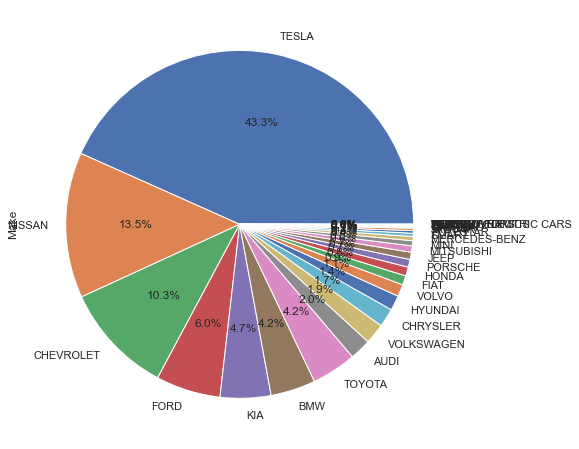

In [483]:
make_values.plot.pie(autopct="%.1f%%");

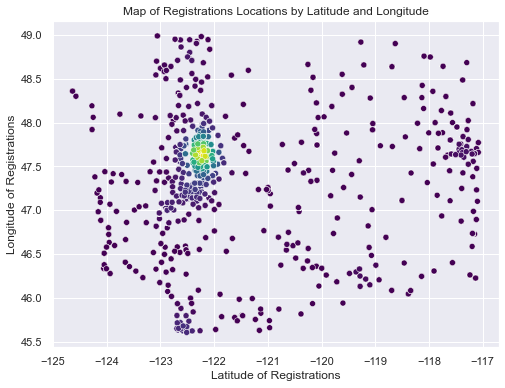

In [451]:
# Density scatterplot: locations of registrations by longitude and latitude
values = np.stack([washington_ev['Latitude'], washington_ev['Longitude']])
kernel = stats.gaussian_kde(values)(values)

fix, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x='Latitude', y='Longitude', data=washington_ev, c=kernel, cmap='viridis', ax=ax)
# Add title and axis names
plt.title('Map of Registrations Locations by Latitude and Longitude')
plt.xlabel('Latitude of Registrations')
plt.ylabel('Longitude of Registrations')
plt.show();

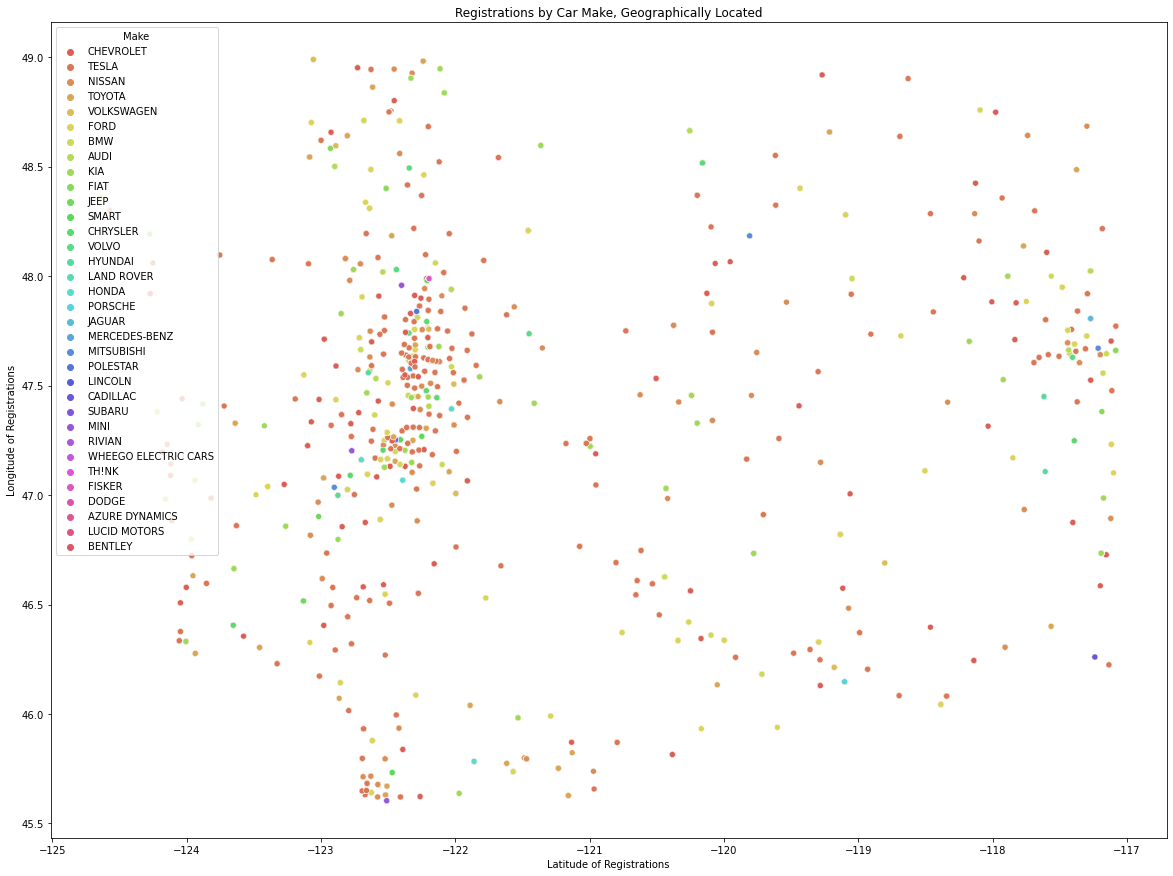

In [264]:
# Graph of properties by Type
# This is what we need to identify with the clustering algorithm

values = np.stack([washington_ev['Latitude'], washington_ev['Longitude']])
kernel = stats.gaussian_kde(values)(values)

fix, ax = plt.subplots(figsize=(20, 15))
ax = sns.scatterplot(x='Latitude', y='Longitude', data=washington_ev, c=kernel, hue="Make", palette=sns.color_palette("hls", 34), ax=ax)
ax.set_title('Registrations by Car Make, Geographically Located')
plt.xlabel('Latitude of Registrations')
plt.ylabel('Longitude of Registrations');

In [484]:
# make_to_keep = ["TESLA", "CHEVROLET","NISSAN", "FORD"]
washington_ev = washington_ev.loc[(washington_ev['Make'] == "TESLA") | (washington_ev['Make'] == "CHEVROLET") | (washington_ev['Make'] == "NISSAN") | (washington_ev['Make'] == "FORD")]
washington_ev.shape

(66541, 13)

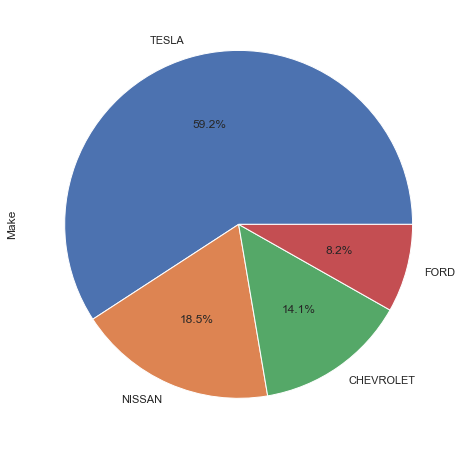

In [485]:
make_values = washington_ev['Make'].value_counts()
make_values.plot.pie(autopct="%.1f%%");

In [486]:
# Keep only columns required for assignment, keep only non-NAN data
features = ['ZIP Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Make', 'County', 'City', 'Latitude', 'Longitude']
#dataset
all_data = washington_ev[features]

In [487]:
# dummy code categorical variables
columns_alldata = all_data.columns
num_names = all_data._get_numeric_data().columns
cat_names = list(set(columns_alldata)-set(num_names))
print('Categorical variables: ', cat_names)

# drop suburb for analysis so only dummy coding for Make
dummy_data = pd.get_dummies(all_data, columns = ['Make'])
dummy_data

Categorical variables:  ['Make', 'County', 'City']


,ZIP Code,Model Year,Electric Range,Base MSRP,County,City,Latitude,Longitude,Make_CHEVROLET,Make_FORD,Make_NISSAN,Make_TESLA
0,98589,2015,38,0,Thurston,TENINO,-122.842388,46.855401,1,0,0,0
1,98275,2018,249,0,Snohomish,MUKILTEO,-122.302507,47.911921,0,0,0,1
3,98503,2017,238,0,Thurston,LACEY,-122.802370,47.024990,1,0,0,0
4,98273,2013,75,0,Skagit,MOUNT VERNON,-122.355669,48.416422,0,0,1,0
5,98026,2019,220,0,Snohomish,EDMONDS,-122.333046,47.829439,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91144,98332,2020,322,0,Pierce,GIG HARBOR,-122.599454,47.365820,0,0,0,1
91146,98012,2019,220,0,Snohomish,BOTHELL,-122.201515,47.843376,0,0,0,1
91147,98258,2018,215,0,Snohomish,LAKE STEVENS,-122.085999,48.016305,0,0,0,1
91148,98023,2019,220,0,King,FEDERAL WAY,-122.362029,47.308531,0,0,0,1


<AxesSubplot:>

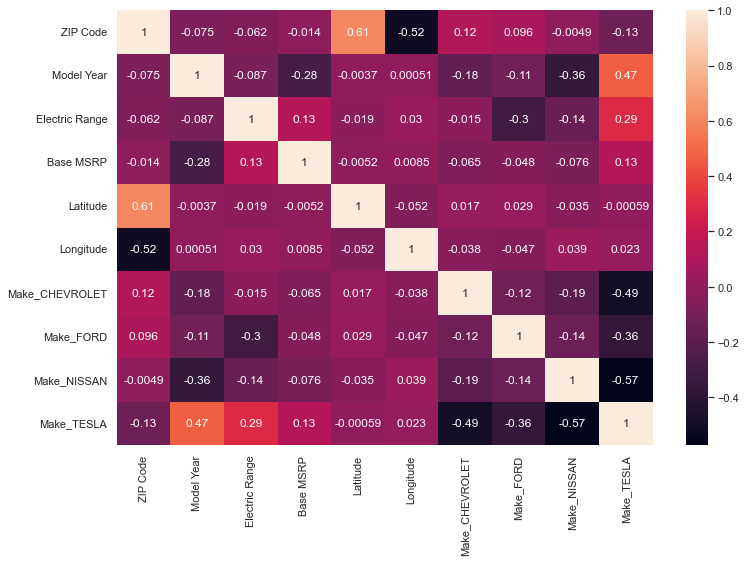

In [488]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(dummy_data.corr(), annot = True)

In [489]:
additional_data = all_data[['Make', 'County', 'City', 'Latitude', 'Longitude']]
all_data = all_data.drop(['Make', 'County', 'City', 'Latitude', 'Longitude'], axis=1)
all_data

,ZIP Code,Model Year,Electric Range,Base MSRP
0,98589,2015,38,0
1,98275,2018,249,0
3,98503,2017,238,0
4,98273,2013,75,0
5,98026,2019,220,0
...,...,...,...,...
91144,98332,2020,322,0
91146,98012,2019,220,0
91147,98258,2018,215,0
91148,98023,2019,220,0


In [490]:
additional_data = pd.DataFrame(additional_data)
additional_data.head()

,Make,County,City,Latitude,Longitude
0,CHEVROLET,Thurston,TENINO,-122.842388,46.855401
1,TESLA,Snohomish,MUKILTEO,-122.302507,47.911921
3,CHEVROLET,Thurston,LACEY,-122.802370,47.024990
4,NISSAN,Skagit,MOUNT VERNON,-122.355669,48.416422
5,TESLA,Snohomish,EDMONDS,-122.333046,47.829439


In [491]:
all_data.isna().sum()

ZIP Code          0
Model Year        0
Electric Range    0
Base MSRP         0
dtype: int64

## Preparing data for Analysis with standardscaler

In [492]:
# scaling the dataset
standard_scaler_1 = StandardScaler()
scaled_data = standard_scaler_1.fit(all_data).transform(all_data)
scaled_data[1]
len(scaled_data)

66541

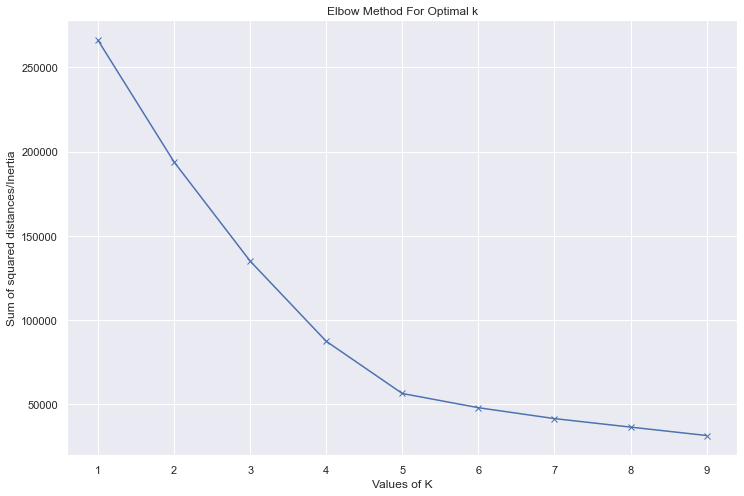

In [493]:
#elbow method to determine number of clusters
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(scaled_data)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [421]:
# from sklearn.metrics import silhouette_score

# range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
 
#  # initialise kmeans
#  kmeans = KMeans(n_clusters=num_clusters)
#  kmeans.fit(scaled_data)
#  cluster_labels = kmeans.labels_
 
#  # silhouette score
#  silhouette_avg.append(silhouette_score(scaled_data, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

In [494]:
kmeans = KMeans(n_clusters = 5, random_state = 0).fit_predict(scaled_data)

In [495]:
print(len(all_data))
print(len(scaled_data))
print(len(kmeans))

66541
66541
66541


In [496]:
# creating a new column to variables with kmeans
kmeans_standard_scaler = all_data.copy()
kmeans_standard_scaler['kmeans_groups'] = kmeans
kmeans_standard_scaler.head()

,ZIP Code,Model Year,Electric Range,Base MSRP,kmeans_groups
0,98589,2015,38,0,4
1,98275,2018,249,0,2
3,98503,2017,238,0,2
4,98273,2013,75,0,4
5,98026,2019,220,0,2


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


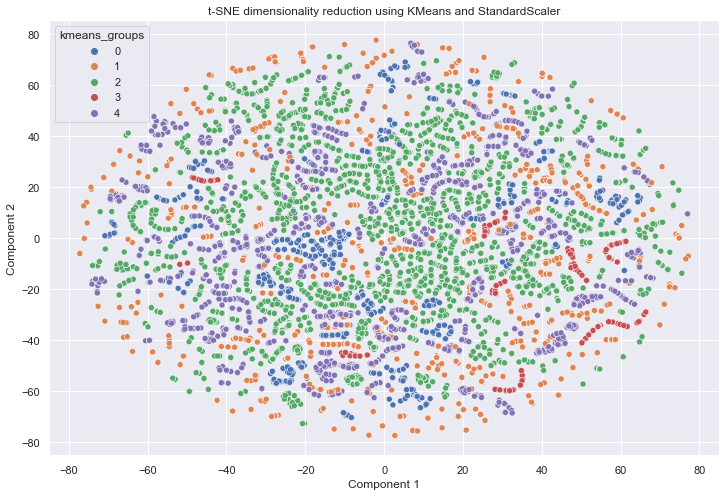

In [427]:
# perform t-SNE on grouping parameters
tsne = TSNE()
X_stdscaler_kmeans = tsne.fit_transform(kmeans_standard_scaler)

sns.scatterplot(X_stdscaler_kmeans[:,0], X_stdscaler_kmeans[:,1],
               hue = kmeans_standard_scaler['kmeans_groups'],
                legend = 'full', palette = 'deep').set(title = 
                                     't-SNE dimensionality reduction using KMeans and StandardScaler',
                                    xlabel = 'Component 1',
                                    ylabel = 'Component 2');

In [497]:
washington_ev.groupby('Make').count()

,County,City,State,ZIP Code,Model Year,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Latitude,Longitude
Make,,,,,,,,,,,,
CHEVROLET,9403,9403,9403,9403,9403,9403,9403,9403,9403,9403,9403,9403
FORD,5456,5456,5456,5456,5456,5456,5456,5456,5456,5456,5456,5456
NISSAN,12303,12303,12303,12303,12303,12303,12303,12303,12303,12303,12303,12303
TESLA,39379,39379,39379,39379,39379,39379,39379,39379,39379,39379,39379,39379


In [498]:
additional_data

,Make,County,City,Latitude,Longitude
0,CHEVROLET,Thurston,TENINO,-122.842388,46.855401
1,TESLA,Snohomish,MUKILTEO,-122.302507,47.911921
3,CHEVROLET,Thurston,LACEY,-122.802370,47.024990
4,NISSAN,Skagit,MOUNT VERNON,-122.355669,48.416422
5,TESLA,Snohomish,EDMONDS,-122.333046,47.829439
...,...,...,...,...,...
91144,TESLA,Pierce,GIG HARBOR,-122.599454,47.365820
91146,TESLA,Snohomish,BOTHELL,-122.201515,47.843376
91147,TESLA,Snohomish,LAKE STEVENS,-122.085999,48.016305
91148,TESLA,King,FEDERAL WAY,-122.362029,47.308531


In [499]:
additional_data.groupby(['Make']).count()

,County,City,Latitude,Longitude
Make,,,,
CHEVROLET,9403,9403,9403,9403
FORD,5456,5456,5456,5456
NISSAN,12303,12303,12303,12303
TESLA,39379,39379,39379,39379


## KMeans StandardScaler

In [501]:
# KMeans Standard Scaler

# importing Type and other data back in
kmeans_standard_scaler_withtype = pd.concat([kmeans_standard_scaler, 
                                             additional_data], axis =1)
# dummy code Type
Type_names = pd.get_dummies(kmeans_standard_scaler_withtype['Make'])
kmeans_standard_scaler_withtype[["TESLA", "CHEVROLET","NISSAN", "FORD"]] = Type_names
kmeans_standard_scaler_withtype = kmeans_standard_scaler_withtype.drop('Make',axis=1)
kmeans_standard_scaler_withtype.head()

,ZIP Code,Model Year,Electric Range,Base MSRP,kmeans_groups,County,City,Latitude,Longitude,TESLA,CHEVROLET,NISSAN,FORD
0,98589,2015,38,0,4,Thurston,TENINO,-122.842388,46.855401,1,0,0,0
1,98275,2018,249,0,2,Snohomish,MUKILTEO,-122.302507,47.911921,0,0,0,1
3,98503,2017,238,0,2,Thurston,LACEY,-122.802370,47.024990,1,0,0,0
4,98273,2013,75,0,4,Skagit,MOUNT VERNON,-122.355669,48.416422,0,0,1,0
5,98026,2019,220,0,2,Snohomish,EDMONDS,-122.333046,47.829439,0,0,0,1


In [502]:
# cluster vs Type
pd.set_option("display.max_rows", kmeans_standard_scaler_withtype.index.shape[0])
kmeans_standard_scaler_withtype.groupby(['kmeans_groups'])["TESLA", "CHEVROLET","NISSAN", "FORD"].sum()

/var/folders/f9/913jww4d6bb263f47kj56bhr0000gn/T/ipykernel_53884/3572301595.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  kmeans_standard_scaler_withtype.groupby(['kmeans_groups'])["TESLA", "CHEVROLET","NISSAN", "FORD"].sum()


,TESLA,CHEVROLET,NISSAN,FORD
kmeans_groups,,,,
0,1363.0,662.0,1023.0,3176.0
1,969.0,1800.0,1079.0,13447.0
2,3263.0,3.0,2773.0,20916.0
3,0.0,0.0,0.0,1690.0
4,3808.0,2991.0,7428.0,150.0


In [503]:
kmeans_standard_scaler_withtype.groupby(['kmeans_groups', 'County'])['Electric Range'].sum()

kmeans_groups  County      
0              Adams              2971
               Asotin             3115
               Benton            91259
               Chelan            56709
               Clark            283198
               Columbia            875
               Cowlitz           20038
               Douglas           13984
               Ferry              2070
               Franklin          21458
               Garfield             38
               Grant             17317
               Grays Harbor       2028
               Kittitas          30213
               Klickitat          7598
               Lewis              2628
               Lincoln            1150
               Mason              3440
               Okanogan          12055
               Pacific            5201
               Pend Oreille       2240
               Pierce              992
               Skamania           6199
               Spokane          157587
               Stevens            79

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

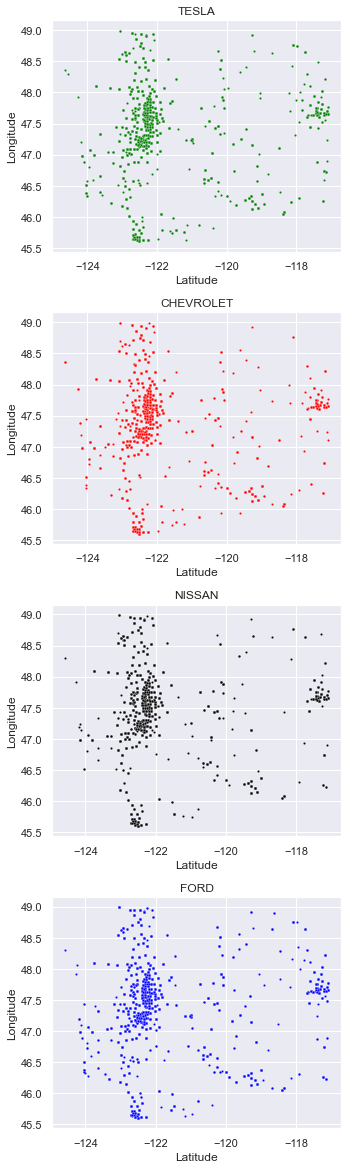

In [505]:
fig, ax = plt.subplots(figsize = (5,20));
ax = plt.subplot(5,1,1)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['TESLA']==1], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['TESLA']==1],
                s = 5, color = 'green').set(title = "TESLA");
ax = plt.subplot(5,1,2)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['CHEVROLET']==1], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['CHEVROLET']==1],
                s = 5, color = 'red').set(title = "CHEVROLET");
ax = plt.subplot(5,1,3)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['NISSAN']==1], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['NISSAN']==1],
                s = 5, color = 'black').set(title = "NISSAN");
ax = plt.subplot(5,1,4)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['FORD']==1], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['FORD']==1],
                s = 5, color = 'blue').set(title = "FORD");
fig.tight_layout()
plt.show();

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


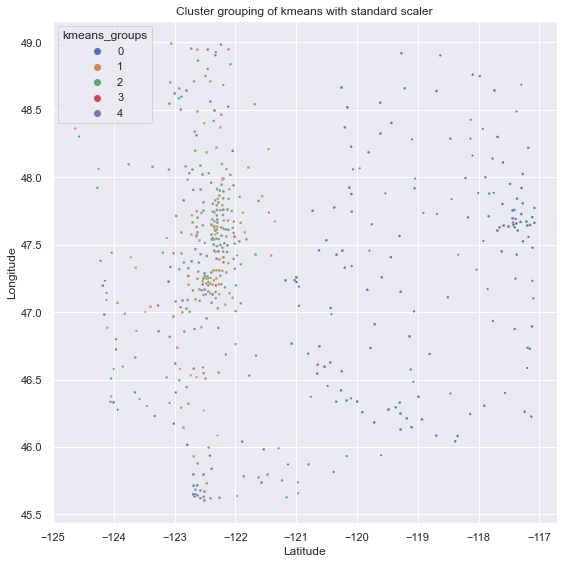

In [506]:
fig, ax = plt.subplots(figsize = (8,8));
sns.scatterplot('Latitude', 'Longitude',
                hue = 'kmeans_groups', s = 5,
                 data = kmeans_standard_scaler_withtype,
               palette = 'deep').set(title = 'Cluster grouping of kmeans with standard scaler');
fig.tight_layout()
plt.show();

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

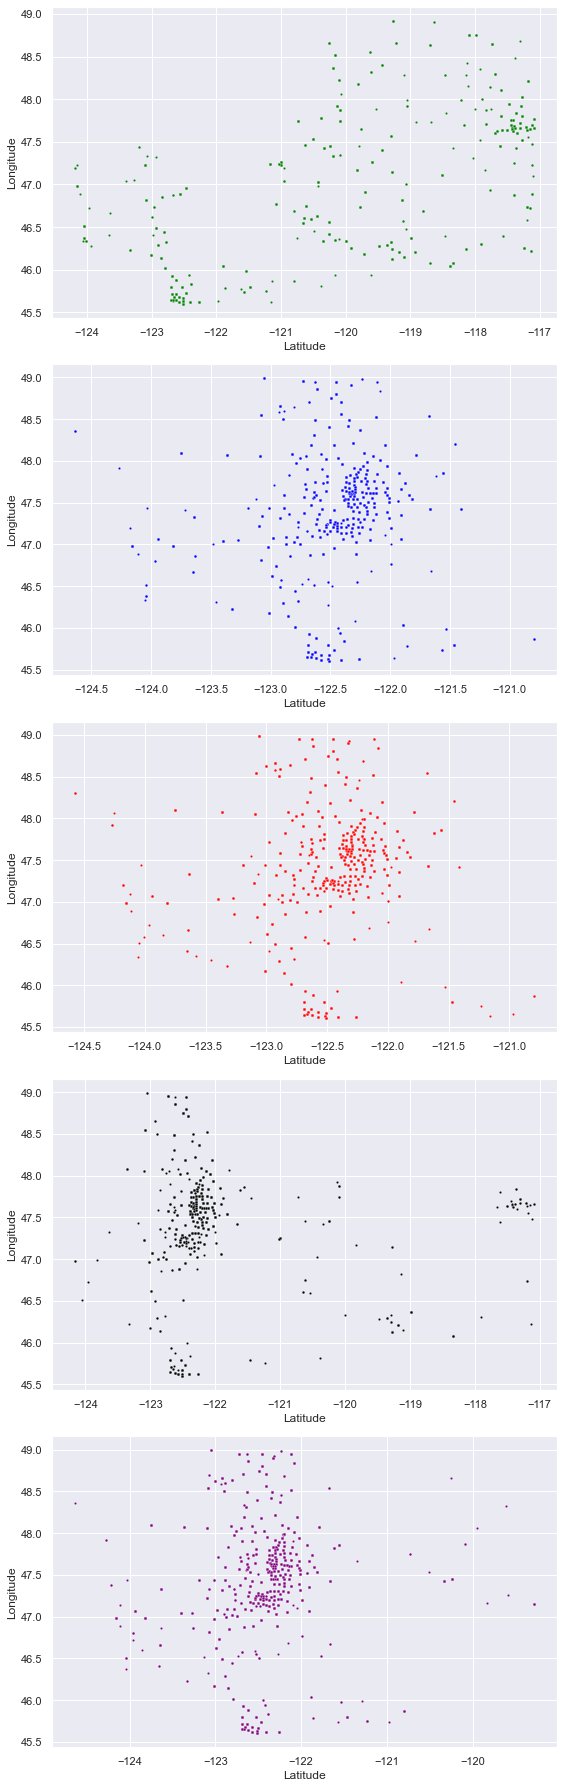

In [508]:
fig, ax = plt.subplots(figsize = (8,25));
ax = plt.subplot(5,1,1)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['kmeans_groups']==0], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['kmeans_groups']==0],
                s = 5, color = 'green');
ax = plt.subplot(5,1,2)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['kmeans_groups']==1], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['kmeans_groups']==1],
                s = 5, color = 'blue');
ax = plt.subplot(5,1,3)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['kmeans_groups']==2], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['kmeans_groups']==2],
                s = 5, color = 'red');
ax = plt.subplot(5,1,4)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['kmeans_groups']==3], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['kmeans_groups']==3],
                s = 5, color = 'black');
ax = plt.subplot(5,1,5)
sns.scatterplot(kmeans_standard_scaler_withtype['Latitude'][kmeans_standard_scaler_withtype['kmeans_groups']==4], 
                kmeans_standard_scaler_withtype['Longitude'][kmeans_standard_scaler_withtype['kmeans_groups']==4],
                s = 5, color = 'purple');
fig.tight_layout()
plt.show();